# Lifecycle In A Data Science Project:



In [132]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [133]:
dataset1=pd.read_csv('demand_data.csv')

## print shape of dataset with rows and columns
print(dataset1.shape)

(84, 6)


In [134]:
dataset2=pd.read_csv('supply_data.csv')
## print shape of dataset with rows and columns
print(dataset2.shape)

(250, 6)


In [135]:
## print the top5 records
dataset1.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48


In [136]:
dataset2.head()

,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,01-01-2000,1727,353065,873,1636
1,2,01-02-2000,1692,351933,856,1737
2,3,01-03-2000,1651,353452,900,1604
3,4,01-04-2000,1597,356188,841,1626
4,5,01-05-2000,1543,349907,857,1575


# Merging supply and demand dataframes:

In [137]:
dataset = pd.concat([dataset1,dataset2], axis = 1)
dataset.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34,1,01-01-2000,1727,353065,873,1636
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67,2,01-02-2000,1692,351933,856,1737
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79,3,01-03-2000,1651,353452,900,1604
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27,4,01-04-2000,1597,356188,841,1626
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48,5,01-05-2000,1543,349907,857,1575


In [138]:
dataset=dataset.drop(['Unnamed: 0'], axis=1)

# In Data Analysis We will Analyze To Find out the below stuff

In [139]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

DATE 0.664  % missing values
UNEM_RATE 0.664  % missing values
MORTGAGE 0.664  % missing values
GDPC1 0.664  % missing values
FORECLOSURES 0.664  % missing values
HPI 0.664  % missing values


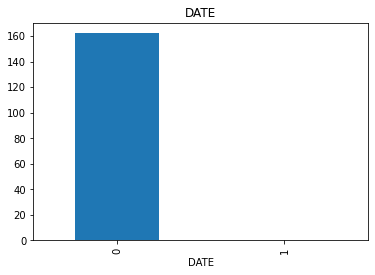

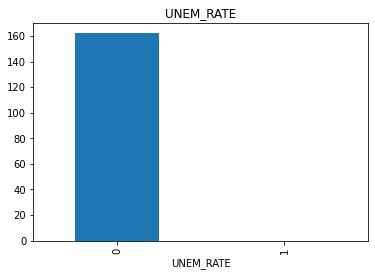

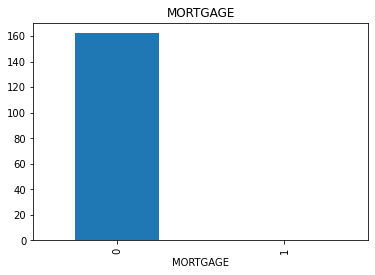

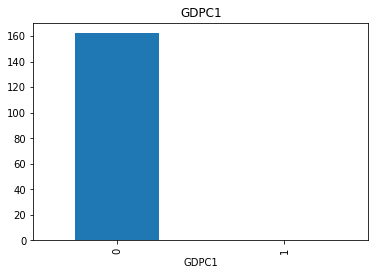

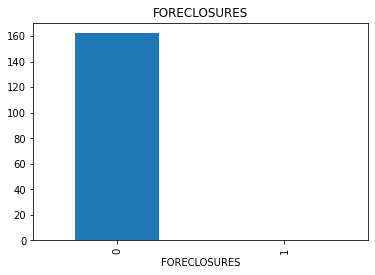

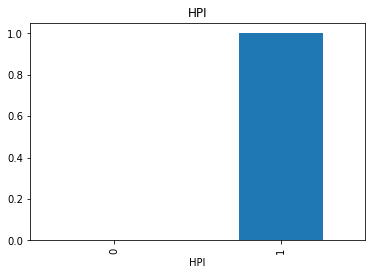

In [140]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['HPI'].median().plot.bar()
    plt.title(feature)
    plt.show()

# Numerical Variables

In [141]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  9


,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Permit_Number,construction,Homes_Sold,Housing_Starts
0,4.03,8.26,12935.252,1.95,101.34,1727,353065,873,1636
1,3.93,8.32,13170.749,1.97,103.67,1692,351933,856,1737
2,4.00,8.02,13183.890,2.09,105.79,1651,353452,900,1604
3,3.90,7.62,13262.250,2.23,108.27,1597,356188,841,1626
4,4.23,7.01,13219.251,2.34,110.48,1543,349907,857,1575


# Temporal Variables(Eg: Datetime Variables)

In [142]:
# list of variables that contain year information
year_feature = [feature for feature in  dataset.columns if 'DATE' in feature or 'Period' in feature]

year_feature

['DATE', 'Period']

In [143]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

DATE ['2000-01-01' '2000-04-01' '2000-07-01' '2000-10-01' '2001-01-01'
 '2001-04-01' '2001-07-01' '2001-10-01' '2002-01-01' '2002-04-01'
 '2002-07-01' '2002-10-01' '2003-01-01' '2003-04-01' '2003-07-01'
 '2003-10-01' '2004-01-01' '2004-04-01' '2004-07-01' '2004-10-01'
 '2005-01-01' '2005-04-01' '2005-07-01' '2005-10-01' '2006-01-01'
 '2006-04-01' '2006-07-01' '2006-10-01' '2007-01-01' '2007-04-01'
 '2007-07-01' '2007-10-01' '2008-01-01' '2008-04-01' '2008-07-01'
 '2008-10-01' '2009-01-01' '2009-04-01' '2009-07-01' '2009-10-01'
 '2010-01-01' '2010-04-01' '2010-07-01' '2010-10-01' '2011-01-01'
 '2011-04-01' '2011-07-01' '2011-10-01' '2012-01-01' '2012-04-01'
 '2012-07-01' '2012-10-01' '2013-01-01' '2013-04-01' '2013-07-01'
 '2013-10-01' '2014-01-01' '2014-04-01' '2014-07-01' '2014-10-01'
 '2015-01-01' '2015-04-01' '2015-07-01' '2015-10-01' '2016-01-01'
 '2016-04-01' '2016-07-01' '2016-10-01' '2017-01-01' '2017-04-01'
 '2017-07-01' '2017-10-01' '2018-01-01' '2018-04-01' '2018-07-01'
 '201

In [144]:
dataset=dataset.drop(['DATE','Period'], axis=1)

In [145]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


# 

# Continuous Variable

In [146]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 9


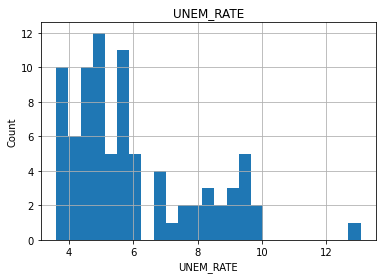

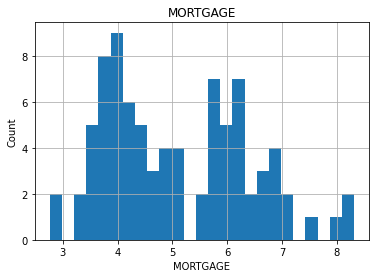

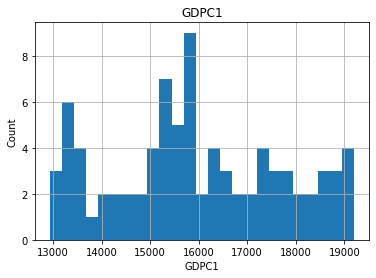

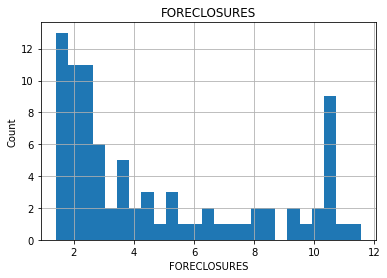

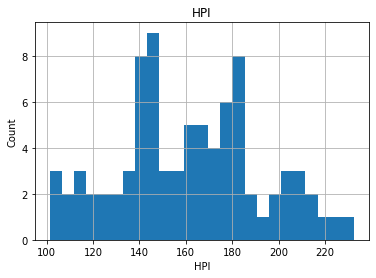

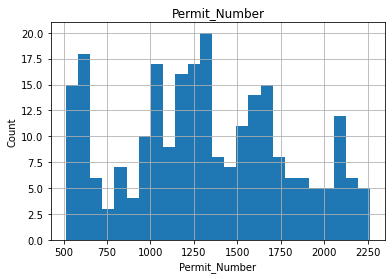

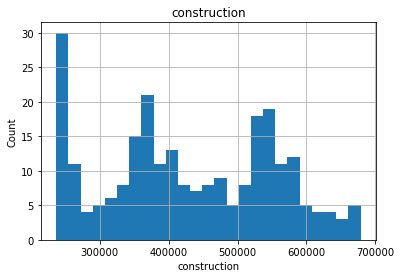

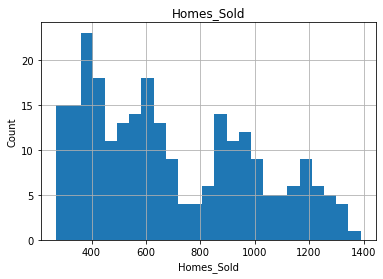

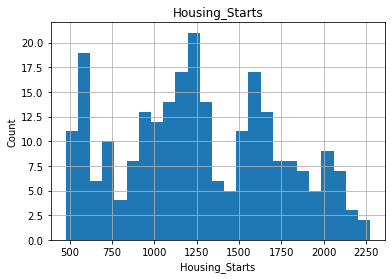

In [147]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

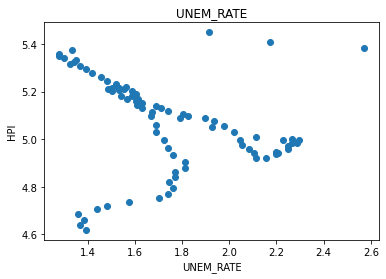

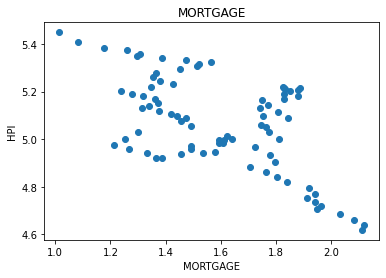

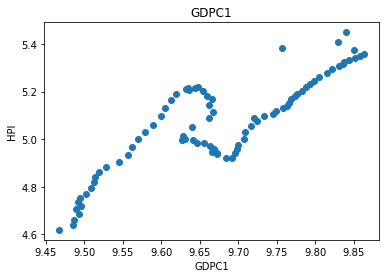

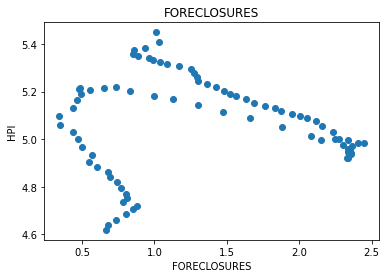

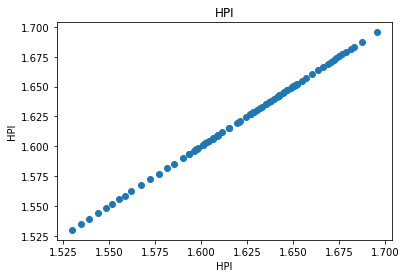

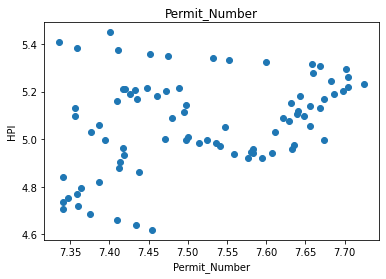

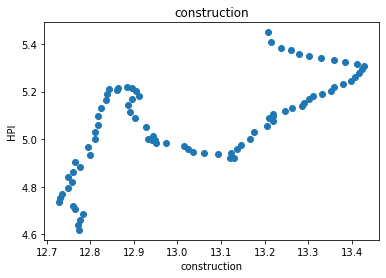

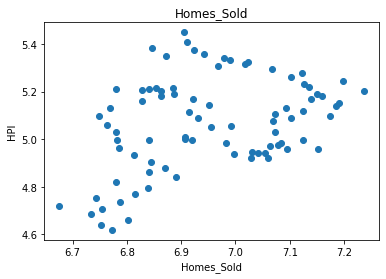

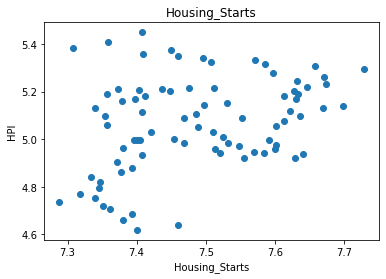

In [148]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['HPI']=np.log(data['HPI'])
        plt.scatter(data[feature],data['HPI'])
        plt.xlabel(feature)
        plt.ylabel('HPI')
        plt.title(feature)
        plt.show()
        

# Outliers

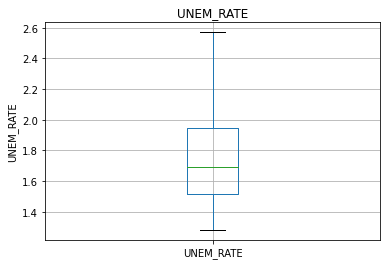

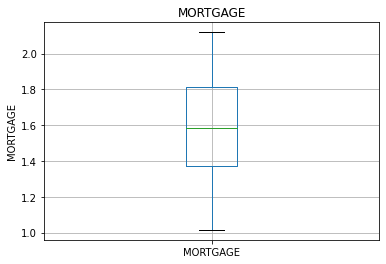

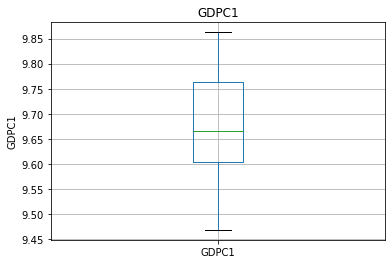

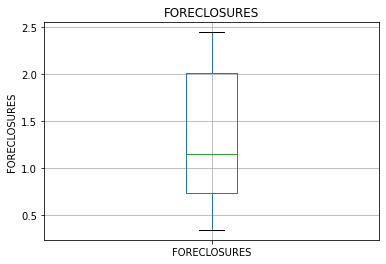

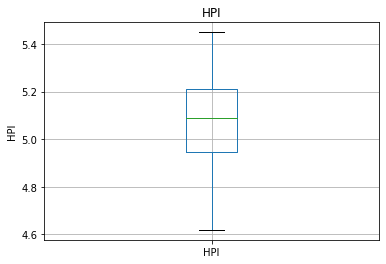

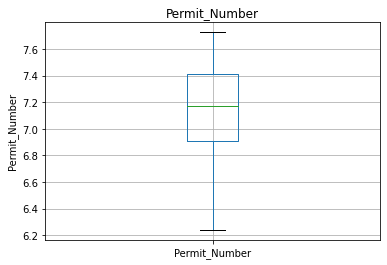

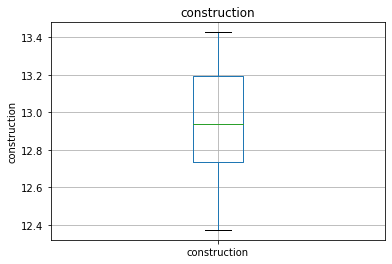

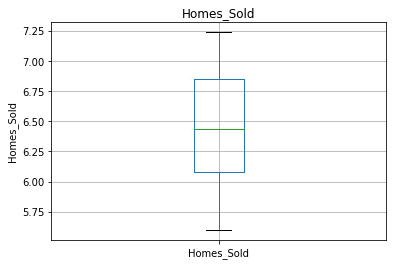

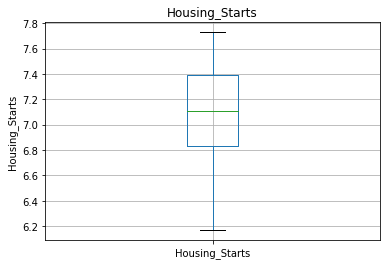

In [149]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Feature Engineering

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['HPI'],test_size=0.1,random_state=0)

In [151]:
X_train.shape, X_test.shape


((225, 9), (25, 9))

# Missing Values

In [152]:
## Let us capture all the nan values

features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

In [153]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Series([], dtype: float64)

In [154]:
dataset.head()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Permit_Number,construction,Homes_Sold,Housing_Starts
0,4.03,8.26,12935.252,1.95,101.34,1727,353065,873,1636
1,3.93,8.32,13170.749,1.97,103.67,1692,351933,856,1737
2,4.00,8.02,13183.890,2.09,105.79,1651,353452,900,1604
3,3.90,7.62,13262.250,2.23,108.27,1597,356188,841,1626
4,4.23,7.01,13219.251,2.34,110.48,1543,349907,857,1575


In [177]:
## Now lets check for  missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in dataset.columns:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

UNEM_RATE: 0.0% missing value
MORTGAGE: 0.0% missing value
GDPC1: 0.0% missing value
FORECLOSURES: 0.0% missing value
HPI: 0.0% missing value
Permit_Number: 0.0% missing value
construction: 0.0% missing value
Homes_Sold: 0.0% missing value
Housing_Starts: 0.0% missing value
UNEM_RATEnan: 0.0% missing value
MORTGAGEnan: 0.0% missing value
GDPC1nan: 0.0% missing value
FORECLOSURESnan: 0.0% missing value
HPInan: 0.0% missing value


In [178]:
## Replacing Missing Values

for feature in dataset.columns:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()
    
    

Series([], dtype: float64)

# Feature Scaling

In [179]:
feature_scale=[feature for feature in dataset.columns if feature not in ['HPI']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [180]:
scaler.transform(dataset[feature_scale])

array([[0.04540655, 0.98920863, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03484688, 1.        , 0.03757696, ..., 0.        , 0.        ,
        0.        ],
       [0.04223865, 0.94604317, 0.0396738 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.19324182, 0.38219424, 0.45209036, ..., 0.        , 0.        ,
        0.        ],
       [0.19324182, 0.38219424, 0.45209036, ..., 0.        , 0.        ,
        0.        ],
       [0.19324182, 0.38219424, 0.45209036, ..., 0.        , 0.        ,
        0.        ]])

In [181]:
# transform the train and test set, and add on the HPI variables
data = pd.concat([dataset[['HPI']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [182]:
data.head()

,HPI,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATEnan,MORTGAGEnan,GDPC1nan,FORECLOSURESnan,HPInan,Permit_Numbernan,constructionnan,Homes_Soldnan,Housing_Startsnan,UNEM_RATEnannan,MORTGAGEnannan,GDPC1nannan,FORECLOSURESnannan,HPInannan
0,101.34,0.045407,0.989209,0.000000,0.053307,0.693714,0.263665,0.538874,0.645125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103.67,0.034847,1.000000,0.037577,0.055281,0.673714,0.261104,0.523682,0.701393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,105.79,0.042239,0.946043,0.039674,0.067127,0.650286,0.264540,0.563003,0.627298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,108.27,0.031679,0.874101,0.052177,0.080948,0.619429,0.270730,0.510277,0.639554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110.48,0.066526,0.764388,0.045316,0.091807,0.588571,0.256521,0.524576,0.611142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [183]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [184]:
## Capture the dependent feature
y_train=dataset[['HPI']]

In [185]:
X_train=dataset.drop(['HPI'],axis=1)

In [186]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [187]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [188]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 22
selected features: 8


In [189]:
selected_feat

Index(['UNEM_RATE', 'MORTGAGE', 'GDPC1', 'FORECLOSURES', 'Permit_Number',
       'construction', 'Homes_Sold', 'Housing_Starts'],
      dtype='object')

In [190]:
X_train.head()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATEnan,MORTGAGEnan,GDPC1nan,FORECLOSURESnan,HPInan,Permit_Numbernan,constructionnan,Homes_Soldnan,Housing_Startsnan,UNEM_RATEnannan,MORTGAGEnannan,GDPC1nannan,FORECLOSURESnannan,HPInannan
0,4.03,8.26,12935.252,1.95,1727,353065,873,1636,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.93,8.32,13170.749,1.97,1692,351933,856,1737,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.00,8.02,13183.890,2.09,1651,353452,900,1604,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.90,7.62,13262.250,2.23,1597,356188,841,1626,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.23,7.01,13219.251,2.34,1543,349907,857,1575,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model Building

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [192]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [193]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}


In [194]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [195]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)